In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

#### Analytic Frequencies of Cantilever Modes:

#####From "Foundations of Nanomechanics" by Andrew Cleland

The Cantilever wave equation is 

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2}$$

The frequencies are determined by the equation

$$\cos(\beta_n l) \cosh(\beta_n l) + 1 = 0 $$

which has solutions $ \beta_n l = 1.875, 4.694, 7.855, 10.996...$

The corresponding frequencies are

$$ f_n = \frac{\omega_n}{2\pi} = \frac{(\beta_nL)^2}{2 \pi L^2}\sqrt{\frac{E I}{\rho A}}$$



In [2]:
BL = [1.8751,4.69409,7.8539, 10.996] #1/m
L = 300*10**(-6) #m
E = 1.53*10**11 #N/m^2
w = 20*10**(-6) #m
h = 2*10**(-6) #m
I = w*h**3/12 #m^4
r = 2330 #kg/m^3
A = w*h #m^2

In [3]:
for B_nL in BL:
    f_n = (B_nL**2/(2*np.pi*L**2))*np.sqrt(E*I/(r*A))
    print f_n, 'Hz'

29089.3232283 Hz
182300.379995 Hz
510335.1528 Hz
1000355.14949 Hz


The functional form for the displacement of mode n is

$$ U_n = a_n(\cos(\beta_n z) - \cosh(\beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z)) $$

with $a_n/b_n = -1.3622, -0.9819, -1.008, -1.000$

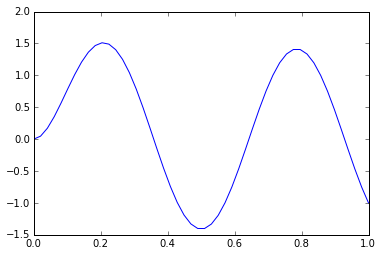

In [4]:
a = [-1.3622, -0.9819, -1.008, -1.000]
b = [1, 1, 1 ,1]
z = np.linspace(0,1)
mode = 4
B_nL = BL[mode-1]
a_n = a[mode-1]
b_n = b[mode-1]
U_n = a_n*(np.cos(B_nL*z)-np.cosh(B_nL*z))+b_n*(np.sin(B_nL*z)-np.sinh(B_nL*z))
f, ax = plt.subplots()
ax.plot(z,U_n)


####Driven Cantilever

If we have a uniformly distributed force per unit length $f(z,t) = f_0 e^{i \omega t}$ the undamped beam wave equation is modified

$$ E I_y \frac{\partial^4 U}{\partial z^4} = - \rho A \frac{\partial^2 U}{\partial t^2} +  f_0 e^{i \omega t}$$

The particular solution will have the same time dependence as $f(z,t)$

$$E I_y \frac{\partial^4 U}{\partial z^4} - \rho A \omega_d^2 U(z) =  f_0 $$

The complete set of functions satisfying the boundary conditions are

$$ \sum_{n=1}^{\infty} a_n(\cos(\beta_n z) - \cosh(\beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z))$$

Inserting this into the wave equation and assuming the modes are sufficiently uncoupled from each other

$$(E I_y \beta_n^4 - \rho A \omega_d^2)a_n(\cos(\beta_n z) - \cosh(beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z)) =  f_0 $$

$$ a_n(\cos(\beta_n z) - \cosh(\beta_n z)) + b_n(\sin(\beta_n z) - \sinh(\beta_n z)) =  \frac{f_0}{\rho A (\omega_n^2-\omega_d^2)} $$

From the boundary conditions at l we find the frequency dependent relationship between the amplitudes $a_n$ and $b_n$

$$ a_n = \frac{\frac{f_0}{\rho A (\omega_n^2-\omega_d^2)} - b_n(\sin(\beta_n l) - \sinh(\beta_n l))}{\cos(\beta_n l) - \cosh(\beta_n l)} $$

Plotting the frequency dependent displacement of the cantilever tip for the fundamental mode

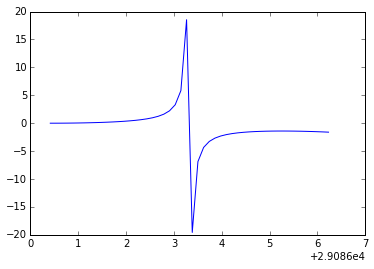

In [5]:
mode=1
f_0 = 1
B_nL = BL[mode-1]
f_n = (B_nL**2/(2*np.pi*L**2))*np.sqrt(E*I/(r*A))
w_n = f_n*2*np.pi
f_d = np.linspace(f_n-f_n/10000,f_n+f_n/10000)
w_d = f_d*2*np.pi
b = [1,1,1,1]
b_n = b[mode-1]
a_n = ((f_0/(r*A*(w_n**2-w_d**2)))-b_n*(np.sin(B_nL)-np.sinh(B_nL)))/(np.cos(B_nL)-np.cosh(B_nL))
#a_n = a[mode-1]
U_n = a_n*(np.cos(B_nL*z)-np.cosh(B_nL*z))+b_n*(np.sin(B_nL*z)-np.sinh(B_nL*z))
f2, ax2 = plt.subplots()
ax2.plot(f_d,U_n)

#### Comsol Simulation

In [6]:
mode1 = mpimg.imread('20150721_cantilever_mode1.png')
mode2 = mpimg.imread('20150721_cantilever_mode2.png')
mode3 = mpimg.imread('20150721_cantilever_mode3.png')

IOError: [Errno 2] No such file or directory: '20150721_cantilever_mode1.png'

In [ ]:

c_modes = [mode1, mode2, mode3]
for img in c_modes:
    plt.figure()
    plt.imshow(img)
    plt.show()